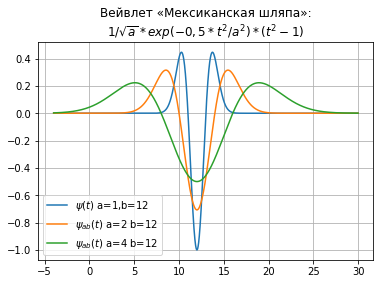

In [11]:
from numpy import*
import matplotlib.pyplot as plt
x= arange(-4,30,0.01)
def w(a,b,t):    
    f =(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)
    return f
plt.title("Вейвлет «Мексиканская шляпа»:\n$1/\sqrt{a}*exp(-0,5*t^{2}/a^{2})*(t^{2}-1)$")
y=[w(1,12,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ a=1,b=12") 
y=[w(2,12,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=2 b=12")   
y=[w(4,12,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=4 b=12")   
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [20]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N=256
T=50

Size = 200

def S(t):
    if t >= 0 and t <=Size:
        return sin(2*pi*t/T)
    else:
        return 0
#     return sin(2*pi*t/T)



def S_noise(t):
    return sin(2*pi*t/T)+ np.random.normal(0, 0.2, 1)

def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2) * (((t-b)/a)**2-1)*S(t)  
    r = quad(f, -N, N)  #интеграл
    return round(r[0],3)  #round(number[, ndigits]) - округляет число number до ndigits знаков после запятой

def w_n(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2) * (((t-b)/a)**2-1)*S_noise(t)  
    r = quad(f, -N, N)  #интеграл
    return round(r[0],3)  #round(number[, ndigits]) - округляет число number до ndigits знаков после запятой

/tmp/ipykernel_269594/3629349284.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


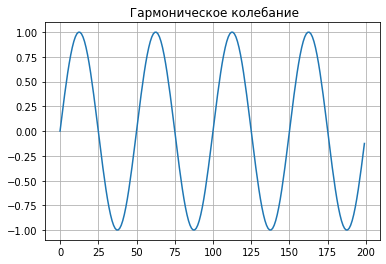

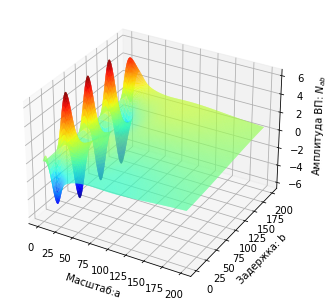

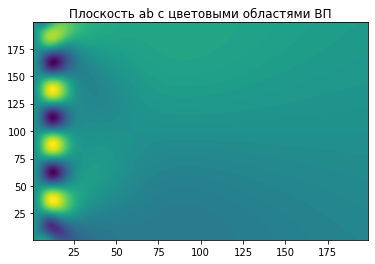

In [21]:
plt.figure()
plt.title(' Гармоническое колебание', size=12)
y=[S(t) for t in arange(0,Size,1)]
x=[t for t in arange(0,Size,1)]
plt.plot(x,y)
plt.grid()

x = arange(1,Size,1)
y = arange(1,Size,1)
z = array([w(i,j) for j in y for i in x])

X, Y = meshgrid(x, y)
Z = z.reshape(Size-1,Size-1)

fig = plt.figure('Вейвлет- спектр: гармонического колебания')
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')

plt.figure('2D-график для z = w (a,b)')
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()

In [ ]:
plt.figure()
plt.title(' Гармоническое колебание с шумом', size=12)
y_noise=[S_noise(t) for t in arange(0,100,1)]
x=[t for t in arange(0,100,1)]
plt.plot(x,y_noise)
plt.grid()

x = arange(1,100,1)
y = arange(1,100,1)
z = array([w_n(i,j) for j in y for i in x])

X, Y = meshgrid(x, y)
Z = z.reshape(99,99)

fig = plt.figure('Вейвлет- спектр: гармонического колебания')
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')

plt.figure('2D-график для z = w (a,b)')
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()

/tmp/ipykernel_269594/1374919511.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  r = quad(f, -N, N)  #интеграл
/tmp/ipykernel_269594/1374919511.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  r = quad(f, -N, N)  #интеграл


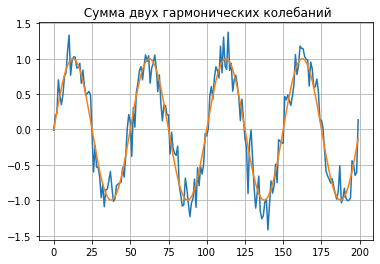

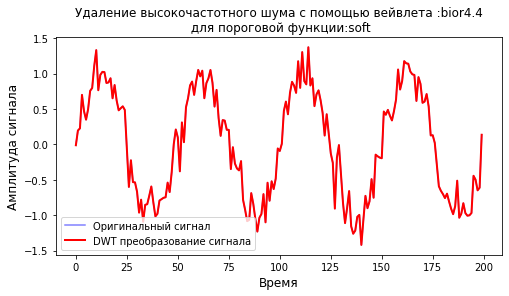

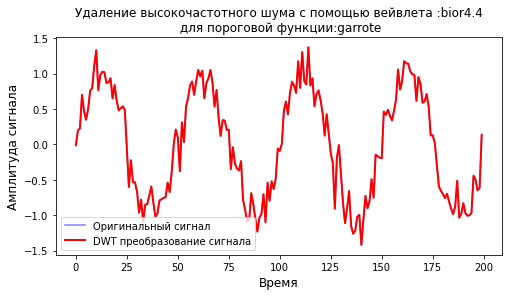

In [95]:
y = [S(t) for t in arange(0,200,1)]
noise = np.random.normal(0,0.2,200)
y_new = y + noise
plt.figure(' Сумма двух гармонических колебаний')
plt.title(' Сумма двух гармонических колебаний', size=12)
x=[t for t in arange(0,200,1)]
plt.plot(x,y_new)
plt.plot(x,y)
plt.grid()

thres=['soft' ,'garrote']
for w in thres:
    
    def lowpassfilter(y_new, thresh, wavelet=v):
        thresh = thresh*nanmax(y_new)
        coeff = pywt.wavedec(y_new, wavelet, level=8,mode="per" )
        coeff[1:] = (pywt.threshold(i, value=thresh, mode=w ) for i in coeff[1:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
        return reconstructed_signal 
    
    fig, ax = subplots(figsize=(8,4))  
    ax.plot(y_new, color="b", alpha=0.5, label='Оригинальный сигнал')
    
    rec = lowpassfilter(Pyro, 0.4)
    ax.plot(y_new, 'r', label='DWT преобразование сигнала', linewidth=2)
    ax.legend()
    ax.set_title('Удаление высокочастотного шума с помощью вейвлета :%s\n для пороговой функции:%s'%(v,w), fontsize=12)
    ax.set_ylabel('Амплитуда сигнала', fontsize=12)
    ax.set_xlabel('Время', fontsize=12)     
show()

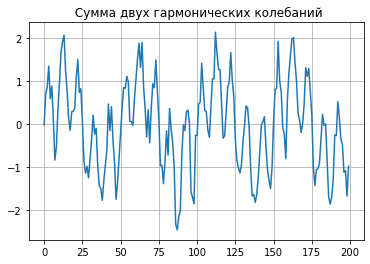

In [62]:
def S(t):
    return sin(2*pi*t/10)+sin(2*pi*t/50) + np.random.normal(0, 0.3, 1)

plt.figure(' Сумма двух гармонических колебаний')
plt.title(' Сумма двух гармонических колебаний', size=12)
y=[S(t) for t in arange(0,200,1)]
x=[t for t in arange(0,200,1)]
#y=[S(t) for t in arange(0,200,1)]
#noise = np.random.normal(0,0.3,200)
#y = y + noise
plt.plot(x,y)
plt.grid()

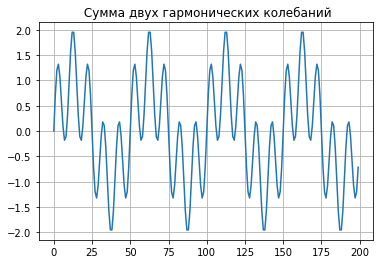

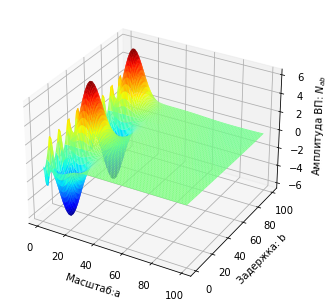

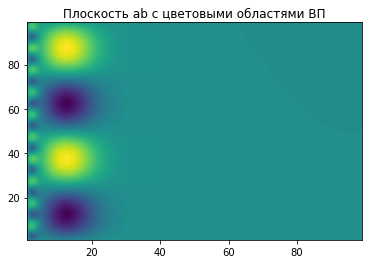

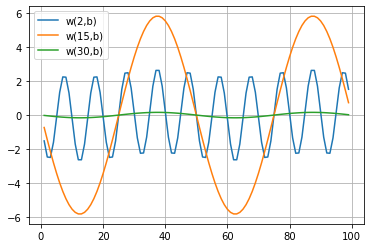

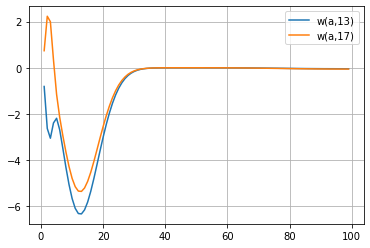

In [97]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N=256

def S(t):
    return sin(2*pi*t/10)+sin(2*pi*t/50)

plt.figure(' Сумма двух гармонических колебаний')
plt.title(' Сумма двух гармонических колебаний', size=12)
y=[S(t) for t in arange(0,200,1)]
x=[t for t in arange(0,200,1)]
plt.plot(x,y)
plt.grid()



def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*(S(t))# + noise[])
    r= quad(f, -N, N)
    return round(r[0],3)

x = arange(1,100,1)
y = arange(1,100,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(99, 99)

fig = plt.figure("Вейвлет-спектр:2-х гармонических колебаний")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')

plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z, 100)
plt.figure()

q=[w(2,i) for i in y]
p=[i for i in y]
plt.plot(p,q,label='w(2,b)')
q=[w(15,i) for i in y]
plt.plot(p,q,label='w(15,b)')
q=[w(30,i) for i in y]
plt.plot(p,q,label='w(30,b)')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
q=[w(i,13) for i in x]
p=[i for i in x]
plt.plot(p,q,label='w(a,13)')
q=[w(i,17) for i in x]
plt.plot(p,q,label='w(a,17)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


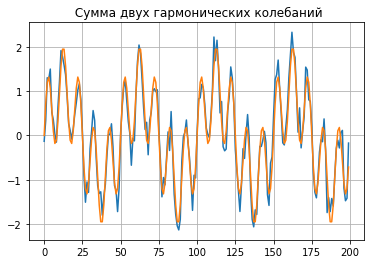

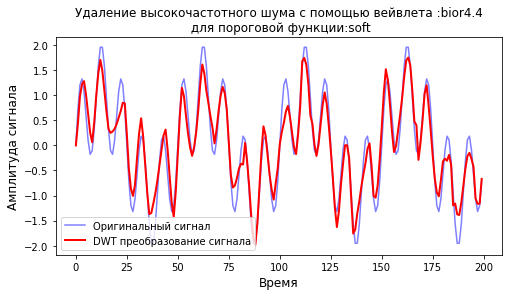

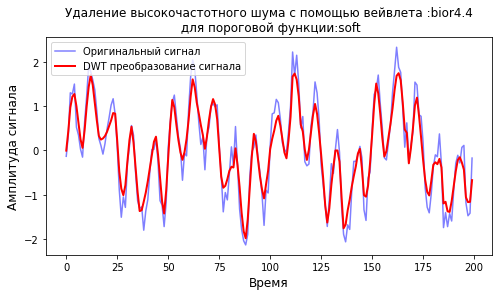

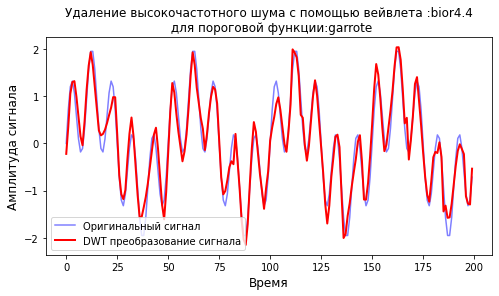

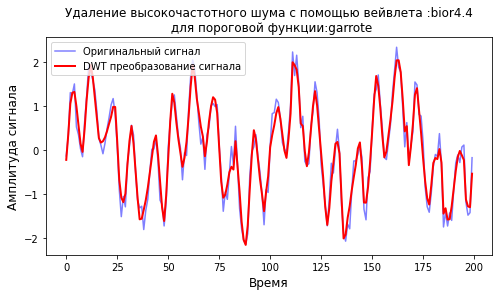

In [41]:
def S(t):
    return sin(2*pi*t/10)+sin(2*pi*t/50)
y=[S(t) for t in arange(0,200,1)]
noise = np.random.normal(0,0.3,200)
y_new = y + noise
plt.figure(' Сумма двух гармонических колебаний')
plt.title(' Сумма двух гармонических колебаний', size=12)
x=[t for t in arange(0,200,1)]
plt.plot(x,y_new)
plt.plot(x,y)
plt.grid()

thres=['soft' ,'garrote']
for w in thres:
    
    def lowpassfilter(y_new, thresh, wavelet=v):
        thresh = thresh*nanmax(y_new)
        coeff = pywt.wavedec(y_new, wavelet, level=8)#,mode="per" )
        coeff[1:] = (pywt.threshold(i, value=thresh, mode=w ) for i in coeff[1:])
        reconstructed_signal = pywt.waverec(coeff, wavelet)#, mode="per" )
        return reconstructed_signal 
    
    fig, ax = subplots(figsize=(8,4)) 
    fig1, ax1 = subplots(figsize=(8,4)) 
    ax.plot(y, color="b", alpha=0.5, label='Оригинальный сигнал')
    ax1.plot(y_new, color="b", alpha=0.5, label='Оригинальный сигнал')
    
    rec = lowpassfilter(y_new, 0.15)
    ax.plot(rec, 'r', label='DWT преобразование сигнала', linewidth=2)
    ax1.plot(rec, 'r', label='DWT преобразование сигнала', linewidth=2)
    ax.legend()
    ax.set_title('Удаление высокочастотного шума с помощью вейвлета :%s\n для пороговой функции:%s'%(v,w), fontsize=12)
    ax.set_ylabel('Амплитуда сигнала', fontsize=12)
    ax.set_xlabel('Время', fontsize=12)   
    ax1.legend()
    ax1.set_title('Удаление высокочастотного шума с помощью вейвлета :%s\n для пороговой функции:%s'%(v,w), fontsize=12)
    ax1.set_ylabel('Амплитуда сигнала', fontsize=12)
    ax1.set_xlabel('Время', fontsize=12)   
show()

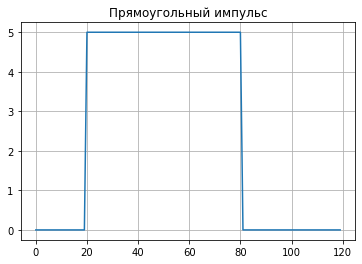

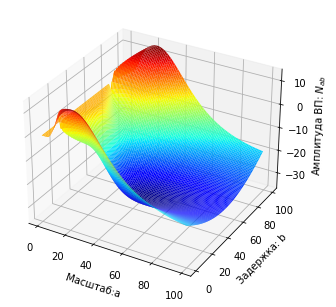

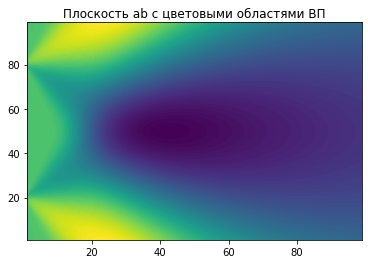

In [8]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N=256

def S(t):
    U=5;t0=20;tau=60
    if  t0<=t<=t0+tau:
        return U
    else:
        return 0
    
plt.figure()
plt.title('Прямоугольный импульс', size=12)
y=[S(t) for t in arange(0,120,1)]
x=[t for t in arange(0,120,1)]
plt.plot(x,y)
plt.grid()

def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)

x = arange(1,100,1)
y = arange(1,100,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(99, 99)

fig = plt.figure("3D-график вейвлет спектрограммы")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()

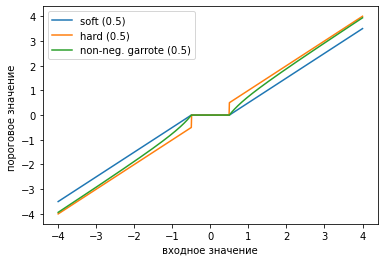

In [81]:
from scipy import*
from pylab import*
import pywt

s = linspace(-4, 4, 1000)
s_soft = pywt.threshold(s, value=0.5, mode='soft')
s_hard = pywt.threshold(s, value=0.5, mode='hard')
s_garrote = pywt.threshold(s, value=0.5, mode='garrote')
figsize=(10, 4)
plot(s, s_soft)
plot(s, s_hard)
plot(s, s_garrote)
legend(['soft (0.5)', 'hard (0.5)', 'non-neg. garrote (0.5)'])
xlabel(' входное значение ')
ylabel('пороговое значение ')
show()

           x         Pyro         OAD      y2         Ref
0          0  637755000.0 -33743600.0 -159744   -547072.0
1          1  665619000.0 -31618000.0 -164608  -8699900.0
2          2  712540000.0 -28067100.0 -190976 -10134300.0
3          3  731017000.0 -22965000.0 -189440 -12043300.0
4          4  797159000.0 -16724700.0 -189952 -14116600.0
...      ...          ...         ...     ...         ...
47995  47995 -475278000.0   7954690.0 -171776  16955100.0
47996  47996 -312825000.0    126464.0 -185856  18132700.0
47997  47997  -22991600.0  -7788030.0 -161792  16607700.0
47998  47998   68592900.0 -15332400.0 -177408  11885100.0
47999  47999  270396000.0 -22122200.0 -180224   8439300.0

[48000 rows x 5 columns]


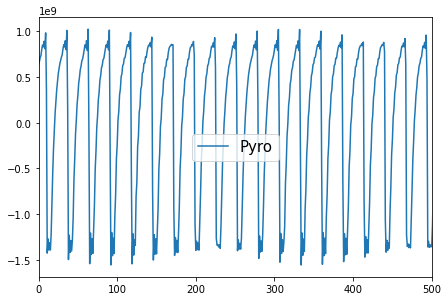

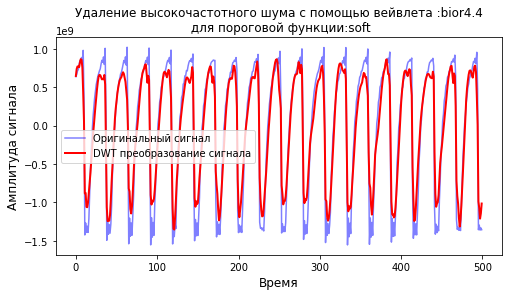

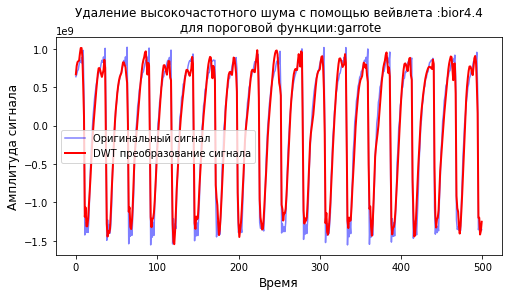

In [83]:
import pandas as pd
from  pylab import *
import pywt

file_name = 'raw CH4 954 ppm'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
Pyro = df1.Pyro.values

fig = plt.figure()
fig.set_size_inches(15.5, 10.5)
ax1 = fig.add_subplot(221)
ax1.set_xlim([0, 500])
ax1.plot(df1.x[:1000],df1.Pyro[:1000], label='Pyro')
ax1.legend(prop={'size': 15})

thres=['soft' ,'garrote']
for w in thres:
    
    def lowpassfilter(Pyro, thresh, wavelet=v):
        thresh = thresh*nanmax(Pyro)
        coeff = pywt.wavedec(Pyro, wavelet, level=8,mode="per" )
        coeff[1:] = (pywt.threshold(i, value=thresh, mode=w ) for i in coeff[1:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
        return reconstructed_signal 
    
    fig, ax = subplots(figsize=(8,4))  
    ax.plot(Pyro[:500], color="b", alpha=0.5, label='Оригинальный сигнал')
    
    rec = lowpassfilter(Pyro, 0.4)
    ax.plot(rec[:500], 'r', label='DWT преобразование сигнала', linewidth=2)
    ax.legend()
    ax.set_title('Удаление высокочастотного шума с помощью вейвлета :%s\n для пороговой функции:%s'%(v,w), fontsize=12)
    ax.set_ylabel('Амплитуда сигнала', fontsize=12)
    ax.set_xlabel('Время', fontsize=12)     
show()

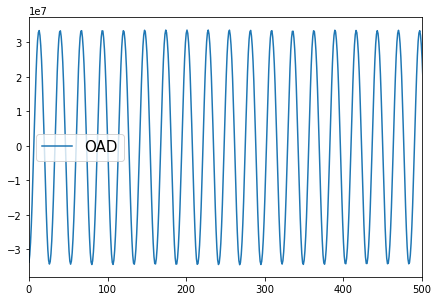

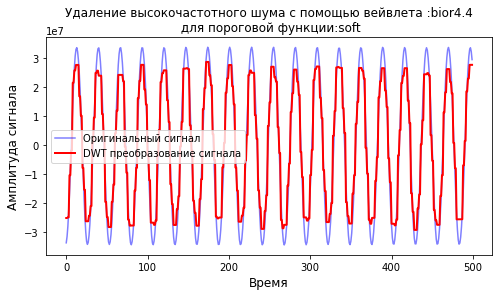

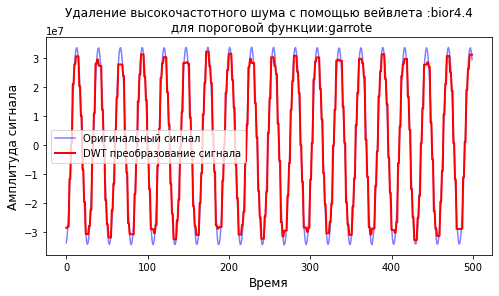

In [57]:
OAD = df1.OAD.values

fig = plt.figure()
fig.set_size_inches(15.5, 10.5)
ax1 = fig.add_subplot(221)
ax1.set_xlim([0, 500])
ax1.plot(df1.x[:1000],df1.OAD[:1000], label='OAD')
ax1.legend(prop={'size': 15})

thres=['soft' ,'garrote']
for w in thres:
    
    def lowpassfilter(OAD, thresh, wavelet=v):
        thresh = thresh*nanmax(OAD)
        coeff = pywt.wavedec(OAD, wavelet, level=8,mode="per" )
        coeff[1:] = (pywt.threshold(i, value=thresh, mode=w ) for i in coeff[1:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
        return reconstructed_signal 
    
    fig, ax = subplots(figsize=(8,4))  
    ax.plot(OAD[:500], color="b", alpha=0.5, label='Оригинальный сигнал')
    
    rec = lowpassfilter(OAD, 0.2, 'bior1.1')
    ax.plot(rec[:500], 'r', label='DWT преобразование сигнала', linewidth=2)
    ax.legend()
    ax.set_title('Удаление высокочастотного шума с помощью вейвлета :%s\n для пороговой функции:%s'%(v,w), fontsize=12)
    ax.set_ylabel('Амплитуда сигнала', fontsize=12)
    ax.set_xlabel('Время', fontsize=12)     
show()

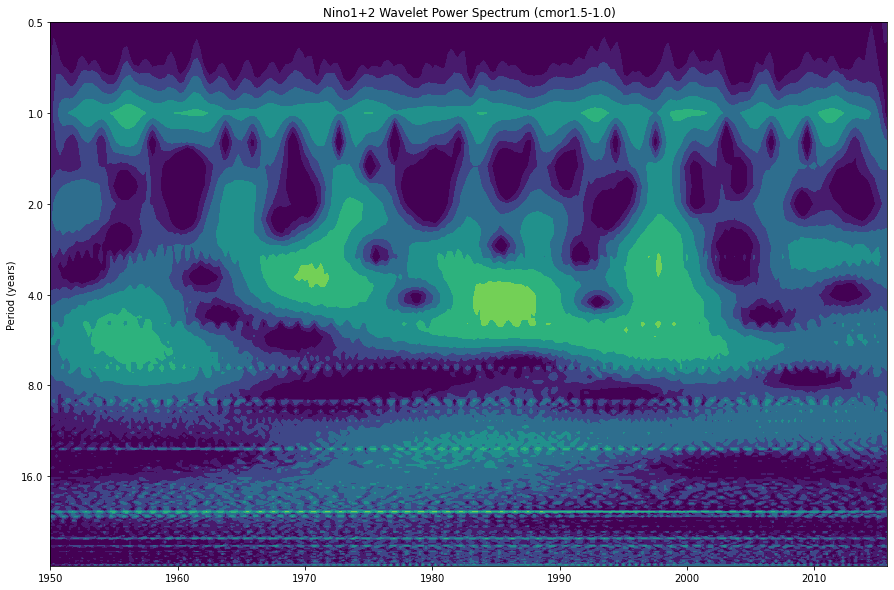

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()